# Chapter 06 확률변수(Random Variable)

In [8]:
%precision 2

'%.2f'

## 6-1 이산확률변수 (Discrete Random Variable)

### #이산확률변수

### [실습]  예제 6-1: 확률변수X의 상태공간(Sx) 구하기
주사위를 두 번 반복하여 던지는 시행에서 두 분의 차의 절대값을  확률변수 X라고 할 때,  X의 상태공간은?

#### 확률변수X의 상태공간(Sx) 구하기

In [2]:
X = list()
for i in range(1, 7):
    for j in range(1, 7):
        X.append(abs(i-j))
Sx = set(X)
Sx

{0, 1, 2, 3, 4, 5}

In [11]:
import random

X, X1 = list(), list()
for k in range(20):  # 숫자를 20 --> 100으로 늘려서 시행하기
    i = random.randint(1, 6)
    j = random.randint(1, 6)
    X1.append([i, j, abs(i-j)])
    print(f'시행횟수({k+1:>3})- D1:{i}, D2:{j}, [i-j]={abs(i-j)} ')

X = [ X1[i][2] for i in range(len(X1)) ]
Sx = set(X)
Sx

시행횟수(  1)- D1:3, D2:6, [i-j]=3 
시행횟수(  2)- D1:5, D2:1, [i-j]=4 
시행횟수(  3)- D1:2, D2:5, [i-j]=3 
시행횟수(  4)- D1:3, D2:4, [i-j]=1 
시행횟수(  5)- D1:4, D2:5, [i-j]=1 
시행횟수(  6)- D1:6, D2:5, [i-j]=1 
시행횟수(  7)- D1:5, D2:6, [i-j]=1 
시행횟수(  8)- D1:5, D2:4, [i-j]=1 
시행횟수(  9)- D1:4, D2:2, [i-j]=2 
시행횟수( 10)- D1:4, D2:4, [i-j]=0 
시행횟수( 11)- D1:3, D2:4, [i-j]=1 
시행횟수( 12)- D1:2, D2:4, [i-j]=2 
시행횟수( 13)- D1:6, D2:5, [i-j]=1 
시행횟수( 14)- D1:2, D2:1, [i-j]=1 
시행횟수( 15)- D1:4, D2:2, [i-j]=2 
시행횟수( 16)- D1:5, D2:6, [i-j]=1 
시행횟수( 17)- D1:1, D2:5, [i-j]=4 
시행횟수( 18)- D1:5, D2:4, [i-j]=1 
시행횟수( 19)- D1:4, D2:4, [i-j]=0 
시행횟수( 20)- D1:5, D2:4, [i-j]=1 


{0, 1, 2, 3, 4}

### [실습] 붓꽃데이터에서 확률변수로 사용할 수 있는 것은
-꽃잎(sepal), 꽃받침(petal)의 length, width, 붓꽃의 종류(species)가 모두 확률변수로 사용될 수 있다.(5개)

In [ ]:
# 사이킷런 빌트인 데이터셋(sklearn.datasets): 붓꽃
from sklearn.datasets import load_iris
iris = load_iris()
iris

In [21]:
# seaborn 빌트인 데이터셋 
import seaborn as sns
df = sns.load_dataset('iris')
df
print(f'이산확률변수(species) : {df.species.unique()}')
print(f'''연속확률변수(sepal_length, sepal_width, petal_length, petal_width)
: sepal_length({df.sepal_length.min()}~{df.sepal_length.max()})''')

이산확률변수(species) : ['setosa' 'versicolor' 'virginica']
연속확률변수(sepal_length, sepal_width, petal_length, petal_width)
: sepal_length(4.3~7.9)


### #확률질량함수 (Probability Mass Function: PMF) 
이산확률변수의 분포를 나타내는 함수

### [실습] 예제 6-3:주사위를 두 번 반복 시행해서 두 눈의 차의 절대값: 확률변수 X 

1. 상태공간(Sx)과 확률변수(X) 구하기

In [89]:
d1 = [1,2,3,4,5,6]
d2 = [1,2,3,4,5,6]
Sx = list()
for i in d1:
    for j in d2:        
        Sx.append(abs(i-j))
Sx.sort()
Sx = set(Sx)
print(f'상태공간(Sx) : {Sx}')
X = list(set(Sx))
print(f'확률변수(X) : {set(X)}')

상태공간(Sx) : {0, 1, 2, 3, 4, 5}
확률변수(X) : {0, 1, 2, 3, 4, 5}


2. 확률변수X의 확률질량함수(fx) 만들기

In [24]:
# 확률변수 X(함수)
def f(x) :
    cnt = 0
    for i in d1:
        for j in d2:        
            if abs(i-j) == x: 
                cnt += 1
    return cnt / (len(d1)*len(d2))

3. 확률변수 X의 확률 구하기

In [30]:
# 확률변수 X의 확률
prob = [f(X) for X in Sx]
prob

[0.16666666666666666,
 0.2777777777777778,
 0.2222222222222222,
 0.16666666666666666,
 0.1111111111111111,
 0.05555555555555555]

- **확률의 합**

In [31]:
sum(prob)

1.0

- **확률변수의 상태 값과 확률**

In [33]:
dict(zip(Sx, prob))

{0: 0.16666666666666666,
 1: 0.2777777777777778,
 2: 0.2222222222222222,
 3: 0.16666666666666666,
 4: 0.1111111111111111,
 5: 0.05555555555555555}

- **확률변수가 취할 수 있는 값과 확률의 대응 그래프**

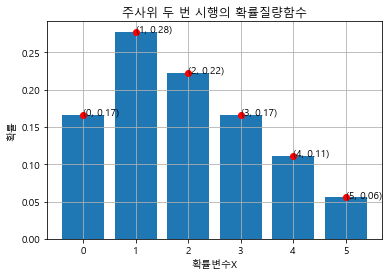

In [37]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' #폰트: 맑은 고딕으로 설정 
plt.rcParams['axes.unicode_minus'] = False    #그래프축 값 마이너스 표시

X = list(Sx)
Y = prob

plt.bar(X, Y, zorder=1)
plt.scatter(X, Y, c='r', zorder=2)
for x, y in  zip(X, Y):
    plt.text(x, y, (x,round(y,2)))
    
plt.title("주사위 두 번 시행의 확률질량함수")
plt.xlabel("확률변수X")
plt.ylabel("확률")
plt.grid()

plt.show()

---------

## 5/13일 수업

### [실습] 확률질량함수와 확률 구하기

- 1. X가 취할 수 있는 상태공간(Sx)과 확률변수(X), 확률(prob) 구하기

동전 4번 던지는 상태공간(Sx): ['HHHH', 'HHHT', 'HHTH', 'HHTT', 'HTHH', 'HTHT', 'HTTH', 'HTTT', 'THHH', 'THHT', 'THTH', 'THTT', 'TTHH', 'TTHT', 'TTTH', 'TTTT']
확률변수(X=0)의 사건: ['TTTT']
확률변수(X=1)의 사건: ['HTTT', 'THTT', 'TTHT', 'TTTH']
확률변수(X=2)의 사건: ['HHTT', 'HTHT', 'HTTH', 'THHT', 'THTH', 'TTHH']
확률변수(X=3)의 사건: ['HHHT', 'HHTH', 'HTHH', 'THHH']
확률변수(X=4)의 사건: ['HHHH']
#확률변수와 확률: {0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}


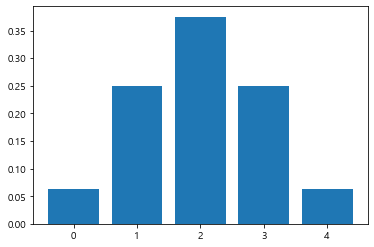

In [60]:
import itertools

# 1.동전 던지기 상태공간(Sx)
t = {'H', 'T'} # coin
r = 4          # repeat
Sx = list(itertools.product(t, repeat=r))
Sx = [''.join(x) for x in Sx]
print(f'동전 {r}번 던지는 상태공간(Sx): {Sx}')


# 2.확률변수(X)
S = [s.count('H') for s in Sx]   # 앞면(H)의 수 세기
X = list(set(S))
for x in X:
    print(f'확률변수(X={x})의 사건: { [Sx[idx] for idx, v in enumerate(S) if x==v]  }')


# 3.확률질량함수(fx)
def f(x):
    return S.count(x) / len(Sx)


# 4.확률변수X의 확률
prob = [f(x) for x in X]
print(f'#확률변수와 확률: {dict(zip(X, prob))}')



# 확률변수와 확률 그래프로 나타내기
import matplotlib.pyplot as plt

plt.bar(X, prob)
plt.show()

In [61]:
# 확률 구하기
print(f'(b) 2일 확률: {f(2)}')
print(f'(c) 2이상일 확률: { sum([f(x) for x in X if x>=2]) }')
print(f'(d) 3이하일 확률: { sum([f(x) for x in X if x<=3]) }')

(b) 2일 확률: 0.375
(c) 2이상일 확률: 0.6875
(d) 3이하일 확률: 0.9375


### 이산확률변수 분포함수

동전 두 번 던지기에서 앞면이 나온 횟수를 확률변수 X라 할 때

In [65]:
import itertools

# 1.동전 던지기 상태공간(Sx)
t = {'H', 'T'} # coin
r = 2          # repeat
Sx = list(itertools.product(t, repeat=r))
Sx = [''.join(x) for x in Sx]
print(f'동전 {r}번 던지는 상태공간(Sx): {Sx}')


# 2.확률변수(X)
S = [s.count('H') for s in Sx]   # 앞면(H)의 수 세기
print(f'동전 {r}번 던지는 상태공간(S): {S}')
X = list(set(S))
for x in X:
    print(f'확률변수(X={x})의 사건: { [Sx[idx] for idx, v in enumerate(S) if x==v]  }')


# 3.확률질량함수(fx)
def f(x):
    return S.count(x) / len(Sx)


# 4.확률분포함수(F(x))
def F(x):
    return sum([f(u) for u in X if u <= x])

# 5.확률분포함수 누적확률
probs = [f(x) for x in X]
s_probs = [F(x) for x in X]
print(f'#확률변수X의 확률질량함수: {dict(zip(X, probs))}')
print(f'#확률변수X의 확률분포함수: {dict(zip(X, s_probs))}')

동전 2번 던지는 상태공간(Sx): ['HH', 'HT', 'TH', 'TT']
동전 2번 던지는 상태공간(S): [2, 1, 1, 0]
확률변수(X=0)의 사건: ['TT']
확률변수(X=1)의 사건: ['HT', 'TH']
확률변수(X=2)의 사건: ['HH']
#확률변수X의 확률질량함수: {0: 0.25, 1: 0.5, 2: 0.25}
#확률변수X의 확률분포함수: {0: 0.25, 1: 0.75, 2: 1.0}


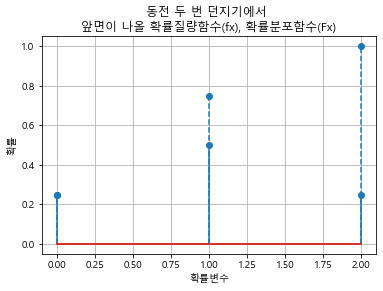

In [78]:
# 동전 두 번  던지기에서 앞면이 나올 이산확률 분포
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic' #폰트: 맑은 고딕으로 설정 

plt.stem(X, probs)
plt.stem(X, s_probs, linefmt='--')
plt.title("동전 두 번 던지기에서 \n앞면이 나올 확률질량함수(fx), 확률분포함수(Fx)")
plt.xlabel("확률변수")
plt.ylabel("확률")
plt.grid()
plt.show()

### [실습] 예제 6-4 : 분포함수 
주사위 두 번 던지기, 확률변수X: 두 눈의 차의 절대값 

상태공간(Sx) : {0, 1, 2, 3, 4, 5}
확률변수(X) : [0, 1, 2, 3, 4, 5]
#확률변수X의 확률질량함수: {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555}
#확률변수X의 확률분포함수: {0: 0.16666666666666666, 1: 0.4444444444444444, 2: 0.6666666666666666, 3: 0.8333333333333333, 4: 0.9444444444444444, 5: 1.0}


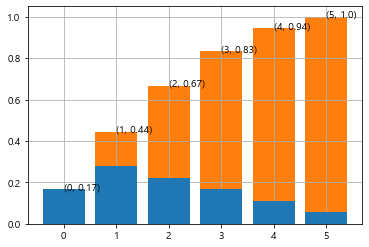

In [102]:
# 1.상태공간(Sx)
D = [1,2,3,4,5,6]
Sx = list()
for i in D:
    for j in D:        
        Sx.append(abs(i-j))
Sx.sort()
Sx = set(Sx)
print(f'상태공간(Sx) : {Sx}')

# 2.확률변수
X = list(set(Sx))
print(f'확률변수(X) : {X}')


# 3.확률질량함수(fx)
def f(x) :
    cnt = 0
    for i in D:
        for j in D:         
            if abs(i-j) == x: 
                cnt += 1
    return cnt / (len(d1)*len(d2))


# 4.확률분포함수(F(x))
def F(x):
    return sum([f(u) for u in X if u <= x])


# 5.확률분포함수 확률
probs = [f(x) for x in X]
s_probs = [F(x) for x in X]
print(f'#확률변수X의 확률질량함수: {dict(zip(X, probs))}')
print(f'#확률변수X의 확률분포함수: {dict(zip(X, s_probs))}')


# 그래프로 그리기
import matplotlib.pyplot as plt

plt.bar(X, probs, zorder=2)
plt.bar(X, s_probs, zorder=1)
for x, y in  zip(X, s_probs):
    plt.text(x, y, (x,round(y,2)) )
plt.grid()
plt.show()

##### 확률 구하기

In [101]:
#(b) P(X=3)절대값이 3 이하가 되는 확률
print(f'P(X=3)     : { F(3) - F(2) } ')

#(c) P(2<=X<=4)
print(f'P(2<=X<=4) : { F(4) - F(2) + probs[2] } ')

#(d) P(X>=4) = 1 - P(X<=3)
print(f'P(X>=4)    : { 1-F(3) } ')

P(X=3)     : 0.16666666666666663 
P(2<=X<=4) : 0.5 
P(X>=4)    : 0.16666666666666674 


-------

## 6-2 연속확률변수 (Continuous Random Variable)

### 20세 이상 남성 키 데이터
https://sizekorea.kr/page/report/1

In [103]:
import pandas as pd

# 한글사용할 때 engine='python'
df = pd.read_csv('data/data_10.csv', encoding='utf-8')
df
df = df.query("성별=='남' and 나이>=20 and 나이<30")
df['키'] = df['키']//10
df

,성별,나이,키
0,남,25,173.0
1,남,28,183.0
3,남,20,175.0
4,남,22,185.0
5,남,23,178.0
...,...,...,...
4853,남,25,168.0
4856,남,29,174.0
4857,남,25,173.0
4867,남,24,168.0


#### 히스토그램 구간: '키' 로 지정

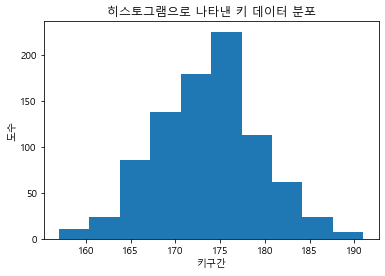

In [104]:
# 히스토그램 구간 만들기
plt.hist(df['키'])
plt.title("히스토그램으로 나타낸 키 데이터 분포")
plt.xlabel("키구간")
plt.ylabel("도수")
plt.show()

### 그래프 여러 개 하나로 나타내기

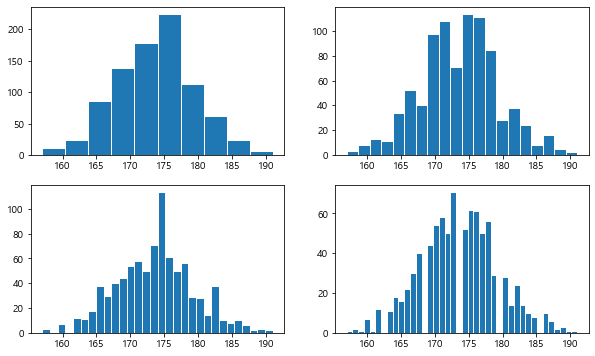

In [110]:
w = 10
h = 6
fig = plt.figure(figsize=(w, h))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(df['키'], bins=10, edgecolor='w') 
ax2.hist(df['키'], bins=20, edgecolor='w')
ax3.hist(df['키'], bins=30, edgecolor='w') 
ax4.hist(df['키'], bins=40, edgecolor='w')
plt.show()

### 확률밀도함수


#### 그래프에 수평선/수직선 그리기
- Axes.hlines(self, y, xmin, xmax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.vlines(self, x, ymin, ymax, colors=None, linestyles='solid', label='', *, data=None, **kwargs)
- Axes.fill_between(self, x, y1, y2=0, where=None, interpolate=False, step=None, **kwargs)

### [실습] 예제 6-7: 연속확률변수의 확률밀도함수 구하기

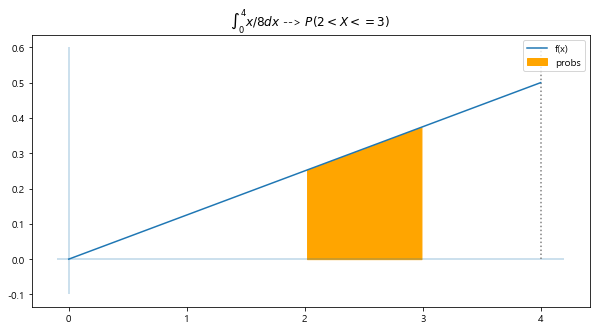

면적--> P(2<X<=3) : (0.3125, 3.469446951953614e-15) 


In [142]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))


# 1.연속확률변수X
X_range = np.array([0, 4]) # 실수로 나타내기 위해서


# 2.확률밀도함수(fx)
def f(x):
    if X_range[0] <= x <= X_range[1]:
        return (1/8*x)
    else:
        return 0

    
# 3.그래프로 구간 나타내기  
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [f(x) for x in X]
# print(f'X : {X}')
# print(f'Y : {Y}')

plt.plot(X, Y, label='f(x)')
plt.hlines(0, -0.1, 4.2, alpha=0.3)
plt.vlines(0, -0.1, 0.6, alpha=0.3)
plt.vlines(X.max(), 0, 0.6, linestyles=':', color='gray')
# 구간 색칠하기
plt.fill_between(X, Y, where=(X>2) & (X<=3), label='probs', color='orange')
plt.legend()
plt.title('$\int_{0}^{4}x/8dx$ --> $P(2<X<=3)$')
plt.show()


# **확률(면적) 구하기**
from scipy import integrate

print(f'면적--> P(2<X<=3) : {integrate.quad(f,2,3)} ')  #f:피적분함수, 2,3: 적분범위   (-np.inf, np.inp: 무한대)
#결과값: (0.3125, 3.469446951953614e-15)=(적분값, 추정오차)

#### 누적분포함수

In [155]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]    #(-np.inf, np.inp: 무한대)

F(3) - F(2)

0.3124999999999945

#### 누적분포함수 그리기

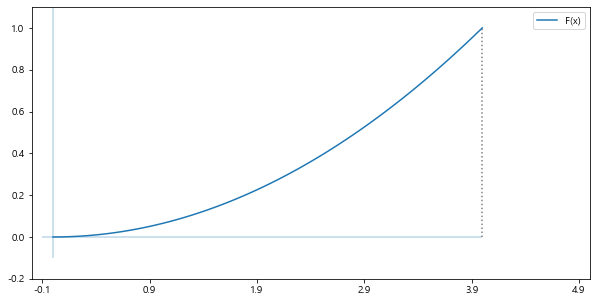

In [153]:
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [F(x) for x in X]

plt.figure(figsize=(10,5))
plt.plot(X, Y, label='F(x)')
plt.hlines(0, -0.1, 4, alpha=0.3)
plt.vlines(0, -0.1, 1.1, alpha=0.3)
plt.vlines(X.max(), 0, 1, linestyles=':',color='gray')

plt.xticks(np.arange(-0.1, 5, 1))
plt.xlim(-0.2, 5)
plt.ylim(-0.2, 1.1)
plt.legend()

plt.show()


### [실습] 예제 6-8 : (구간 색칠하기 오류발생함)

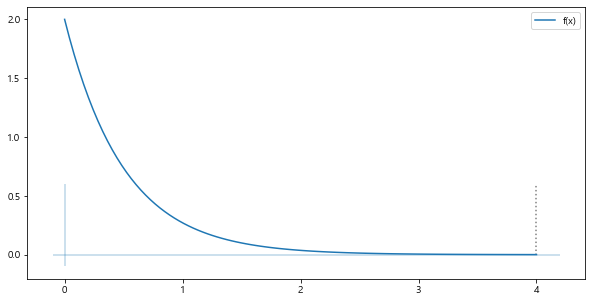

면적--> P(X>2)    : (0.018315638888710205, 9.175589109027242e-09) 
면적--> P(1<X<=2) : (0.1170196443478785, 1.2991790348846178e-15) 


In [189]:
# F(x) = 1 -e^-2x 미분하기
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math

plt.figure(figsize=(10,5))


# 1.연속확률변수X
X_range = np.array([0, 4]) # 실수로 나타내기 위해서


# 2.확률밀도함수(fx)
def f(x):
    return 2*sympy.exp(-2*x)
    #return 2*math.exp(-2*x)
    
# 3.그래프로 구간 나타내기  
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [f(x) for x in X]
# print(f'X : {X}')
# print(f'Y : {Y}')

plt.plot(X, Y, label='f(x)')
plt.hlines(0, -0.1, 4.2, alpha=0.3)
plt.vlines(0, -0.1, 0.6, alpha=0.3)
plt.vlines(X.max(), 0, 0.6, linestyles=':', color='gray')
# 구간 색칠하기 (구간 색칠하기 오류발생함)
#plt.fill_between(X, Y, where=(X>1) & (X<=2), label='probs', color='orange')
plt.legend()
plt.show()


# **확률(면적) 구하기**
from scipy import integrate 
print(f'면적--> P(X>2)    : {integrate.quad(f, 2, np.inf)} ') 
print(f'면적--> P(1<X<=2) : {integrate.quad(f, 1, 2)} ')


### [실습] 예제: 확률구하고 그래프로 나타내기 
 - 전체 초등학생의 수는 10만명
 - 평균 키는 140, 표준편차는 5
일 때
 - 무작위로 한 명을 추출할 때, 145<=키<150일 확률은?


#### 참고 모듈
 - numpy.random.randint(n): 균일분포의 0~n-1사이의 정수 난수 1개 생성
 - numpy.random.rand(m,n) : 0 ~ 1 사이의 균일분포(표준정규분포) 난수를 matrix array(m,n) 생성
 - numpy.random.randn(m,n): 평균 0, 표준편차 1의 가우시안(표준정규분포) 난수를 matrix array(m,n) 생성 

 ##### 1. 평균 140, 표준편차 5인 결과로 10만명의 초등학생 키 데이터 만들기

In [210]:
S, MEAN, STD = 100000, 140, 5
data =  MEAN + np.random.randn(S) * STD
data

array([145.0879051 , 134.4394165 , 144.0981198 , ..., 147.7243652 ,
       147.70029978, 134.31935896])

In [195]:
data.mean()

140.01901902593897

In [196]:
data.std()

5.015863428914521

##### 2. 145~150에 속할 확률 구하기

In [208]:
prob = len([ i for i in data if i >=145 and i<150]) / S
prob

0.13809

##### 3. 그래프로 나타내기

- 히스토그램으로 나타내보기

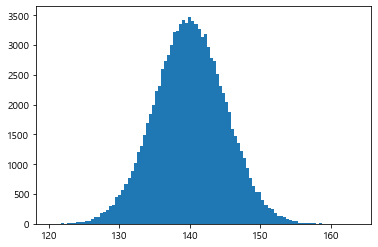

In [206]:
# 히스토그램으로 나타내보기
import matplotlib.pyplot as plt
plt.hist(data,bins=100) # bins의 개수를 10~100개로 변경해 보기
plt.show()

- 확률밀도함수(pdf) 그래프 그리기

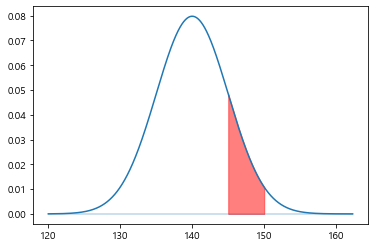

In [214]:
from scipy.stats import norm    # 정규분포관련

data.sort()
X = data
Y = norm.pdf(X, MEAN, STD)   #확률밀도함수(pdf)에 대한 표준정규분포(norm)

plt.plot(X, Y)
plt.hlines(0, min(X), max(X), alpha=0.3)
plt.fill_between(X, Y, where=(X>=145) & (X<150), color='red', alpha=0.5)
plt.show()

-----

---------

## 6-3 확률변수의 평균과 분산

### 예제: 상품권과 복권 수, 평균 상금

1. 표로 나타내기

In [232]:
data = {'상품권': [100,50,10,0],
        '복권수': [2,8,10,30]}
df = pd.DataFrame(data)
df.columns.name='복권'
df

복권,상품권,복권수
0,100,2
1,50,8
2,10,10
3,0,30


2. 당첨 확률 표시하기 (상대도수)

In [233]:
total = df['복권수'].sum()
df['당첨확률'] = [ cnt/total for cnt in df['복권수'] ]
df               

복권,상품권,복권수,당첨확률
0,100,2,0.04
1,50,8,0.16
2,10,10,0.20
3,0,30,0.60


3. 평균 상금

In [63]:
sum([ val*df['당첨확률'][idx] for idx, val in enumerate(df['상품권']) ])

14.0

In [235]:
sum(df.상품권 * df.당첨확률)

14.0

### 기대값: 확률변수의 평균
- 확률변수를 몇 번이나(무제한) 시행하여 얻어진 실현값의 평균
- 무제한 시행할 수 없으므로 확률변수가 취할 수 있는 값과 확률의 곱의 총합

### [실습] 예제:6-9 (이산확률변수의 평균- 기대값(Ex)
이산확률변수의 기댓값은 표본공간의 원소 xi의 가중평균

In [271]:
# 1.상태공간(Sx)
D = [1,2,3,4,5,6]
Sx = list()
for i in D:
    for j in D:        
        Sx.append(abs(i-j))
Sx.sort()
Sx = set(Sx)
print(f'상태공간(Sx) : {Sx}')

# 2.확률변수
X = list(set(Sx))
print(f'확률변수(X) : {X}')


# 3.확률질량함수(fx)
def f(x) :
    cnt = 0
    for i in D:
        for j in D:         
            if abs(i-j) == x: 
                cnt += 1
    return cnt / (len(d1)*len(d2))

# 4.확률변수의 확률
probs = [f(x) for x in X]


# 5. 기대값 E(x)

# def E(X):
#     return np.sum([x * f(x) for x in X])

def E(X, g=lambda x:x):
    return np.sum([g(x) * f(x) for x in X])


print(f'기대값 E(X): {E(X)}')


상태공간(Sx) : {0, 1, 2, 3, 4, 5}
확률변수(X) : [0, 1, 2, 3, 4, 5]
기대값 E(X): 1.9444444444444446


In [241]:
E(X, g=lambda x:2*x+1)

4.888888888888888

#### 이산확률변수에 대해 DataFrame을 이용하여 기대값 E(x) 구하기

In [229]:
# 표로 만들어 보기
data = list(zip(X, probs))
df = pd.DataFrame(data, columns=['확률변수','확률'])
df

1.9444444444444446

In [238]:
# 기대값 E(x)
sum(df.확률변수 * df.확률)

1.9444444444444446

In [231]:
E(X, g=lambda x:x**2)

5.833333333333334

### 분산

In [272]:
mean = E(X)
np.sum([(x - mean)**2 * f(x) for x in X])

2.052469135802469

In [273]:
def V(X, g=lambda x:x):
    mean = E(X, g)
    return np.sum([(g(x) - mean)**2 * f(x) for x in X])

V(X)

2.052469135802469

In [274]:
V(X, g=lambda x:2*x+3)

8.209876543209877

### 표준편차

In [275]:
V(X)**(1/2)

1.4326441064697364

-------

끝